# HEART DISEASE Project:


- __Attribute Information__:

- Only 14 attributes used:
- 1.age
- 2.sex
- 3.cp: chest pain type
      -- Value 1: typical angina
      -- Value 2: atypical angina
      -- Value 3: non-anginal pain
      -- Value 4: asymptomatic
- 4.trestbps=resting blood pressure (in mm Hg on admission to the hospital)
- 5.chol=serum cholestoral in mg/dl
- 6.fbs=fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- 7.restecg= resting electrocardiographic results
            -- Value 0: normal
            -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
            -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- 8.thalach=maximum heart rate achieved
- 9.exang= exercise induced angina (1 = yes; 0 = no)
- 10.oldpeak=ST depression induced by exercise relative to rest
- 11.slope= the slope of the peak exercise ST segment
            -- Value 1: upsloping
            -- Value 2: flat
            -- Value 3: downsloping
- 12.ca= number of major vessels (0-3) colored by flourosopy
- 13.thal=3 = normal; 6 = fixed defect; 7 = reversable defect
- 14.num (the predicted attribute)=diagnosis of heart disease (angiographic disease status),presence (values 1,2,3,4) from absence (value 0).
                                    -- Value 0: < 50% diameter narrowing
                                    -- Value 1: > 50% diameter narrowing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('heartdisease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [5]:
for i in df.columns:
    print(i, df[i].unique())

age [63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]
sex [1 0]
cp [4 3 2 1]
trestbps ['140' '130' '132' '142' '110' '120' '150' '180' '160' '126' '?' '128'
 '170' '152' '116' '124' '0' '122' '144' '154' '125' '104' '136' '134'
 '138' '178' '146' '135' '158' '106' '112' '102' '96' '172' '155' '156'
 '118' '100' '190' '114' '127']
chol ['260' '209' '218' '228' '213' '0' '236' '267' '166' '220' '177' '186'
 '100' '171' '230' '281' '203' '277' '233' '240' '153' '224' '316' '311'
 '270' '217' '214' '252' '339' '216' '276' '458' '241' '384' '297' '248'
 '308' '208' '227' '210' '245' '225' '198' '195' '161' '258' '235' '305'
 '223' '282' '349' '?' '160' '312' '283' '142' '211' '306' '222' '202'
 '197' '204' '274' '192' '298' '272' '200' '261' '181' '221' '175' '219'
 '310' '232' '273' '182' '292' '289' '193' '170' '369' '173' '271' '244'
 '285' '243' '237' '165' '287' '256' '264' '226' '207' '284' '337' '254'
 '300' '333' 

## Dealing with the missing values:

In [6]:
#Target value num is divided between 0 --> absense of heart disease and (1,2,3,4)---> presence of heart disease
df['num'] = np.where(df['num'] !=0 , 1, df['num'])

In [7]:
df['num'].unique()

array([1, 0], dtype=int64)

In [8]:
#replacing ? with nana value
df.replace('?', np.nan, inplace = True)

In [9]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


The feature ca have 99% values missing and there is no point keeping this feature.
The feature thal have more than 83% null value.

In [11]:
df.drop('ca',axis =1, inplace = True)

In [12]:
#masking missing value with 1
df['thal'].fillna(1, inplace = True)
df['thal']=df['thal'].astype(int)
df['thal'].unique()

array([1, 3, 7, 6])

<AxesSubplot:xlabel='thal', ylabel='count'>

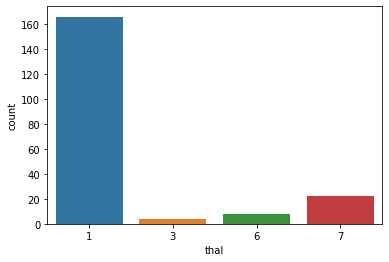

In [13]:
sns.countplot(df['thal'])

<AxesSubplot:xlabel='thal', ylabel='count'>

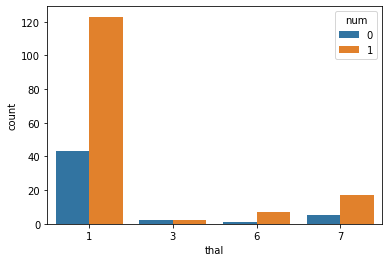

In [14]:
sns.countplot('thal', hue= 'num', data = df)

The ratio of the target value is similar to all other category in thal, hence the feature can be dropped. 

In [15]:
df.drop('thal',axis =1, inplace = True)

<AxesSubplot:xlabel='slope', ylabel='count'>

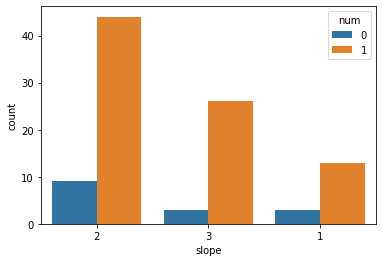

In [16]:
#slope feature also have 51% values missing, 
sns.countplot('slope', hue= 'num', data = df)

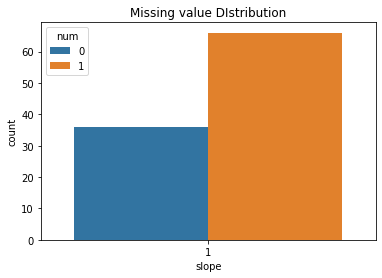

In [17]:
#the ratio is equally divided as the other features and can be ignored as no slope makes a significant contribution
temp =df[df['slope'].isnull()]
temp['slope'].fillna(1, inplace =True)
temp['slope'] = temp['slope'].astype(int)
sns.countplot('slope', hue= 'num', data =temp)
plt.title('Missing value DIstribution')
plt.show()

In [18]:
df.drop('slope',axis =1, inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  num       200 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 17.3+ KB


In [20]:
#Substituitg the random values in the the the features with missing values
cols = ['trestbps','chol','fbs', 'thalach', 'exang','oldpeak' ]
for col in cols:
    df[col]=np.where(df[col].isnull(), random.choice(df[col].dropna()),df[col])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  num       200 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 17.3+ KB


In [22]:
#all the features must be an integer (except oldpeak) and must be coverted as such
for col in df.columns:
    if col == 'oldpeak':
        pass
    else:
        df[col] = df[col].astype(int)

In [23]:
df['oldpeak']=df['oldpeak'].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int32  
 1   sex       200 non-null    int32  
 2   cp        200 non-null    int32  
 3   trestbps  200 non-null    int32  
 4   chol      200 non-null    int32  
 5   fbs       200 non-null    int32  
 6   restecg   200 non-null    int32  
 7   thalach   200 non-null    int32  
 8   exang     200 non-null    int32  
 9   oldpeak   200 non-null    float64
 10  num       200 non-null    int32  
dtypes: float64(1), int32(10)
memory usage: 9.5 KB


In [25]:
df.nunique()

age         39
sex          2
cp           4
trestbps    40
chol        99
fbs          2
restecg      3
thalach     59
exang        2
oldpeak     14
num          2
dtype: int64

In [26]:
#dividig the categorical and non-categorical features, Num is added toeach DF so as to compare it with the target output
c=df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'num']] #categorical  features 
nc=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']] #non-categorical features
c.columns, nc.columns

(Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'num'], dtype='object'),
 Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num'], dtype='object'))

In [27]:
nc.describe()

,age,trestbps,chol,thalach,oldpeak,num
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000
mean,59.350000,127.67000,172.490000,113.045000,1.23100,0.745000
std,7.811697,20.71974,116.752497,24.896226,0.94881,0.436955
min,35.000000,0.00000,0.000000,69.000000,-0.50000,0.000000
25%,55.000000,112.00000,0.000000,86.000000,1.00000,0.000000
50%,60.000000,123.00000,214.000000,111.500000,1.00000,1.000000
75%,64.000000,140.00000,254.500000,130.000000,2.00000,1.000000
max,77.000000,190.00000,458.000000,180.000000,4.00000,1.000000


# Exploratory Data Analysis

<AxesSubplot:xlabel='num', ylabel='count'>

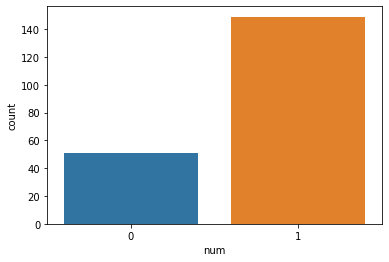

In [28]:
#more people were diagnosed with the heart disease
sns.countplot(df['num'])

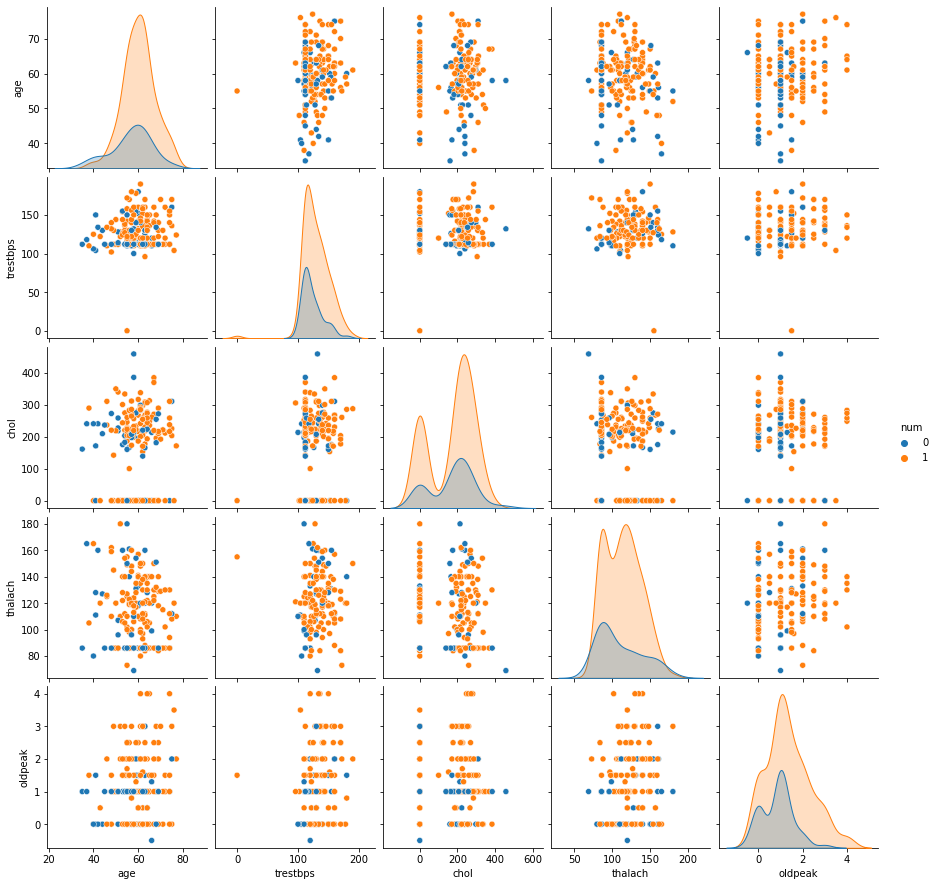

In [29]:
#interrealtion among non categorical features
sns.pairplot(nc, hue = 'num')

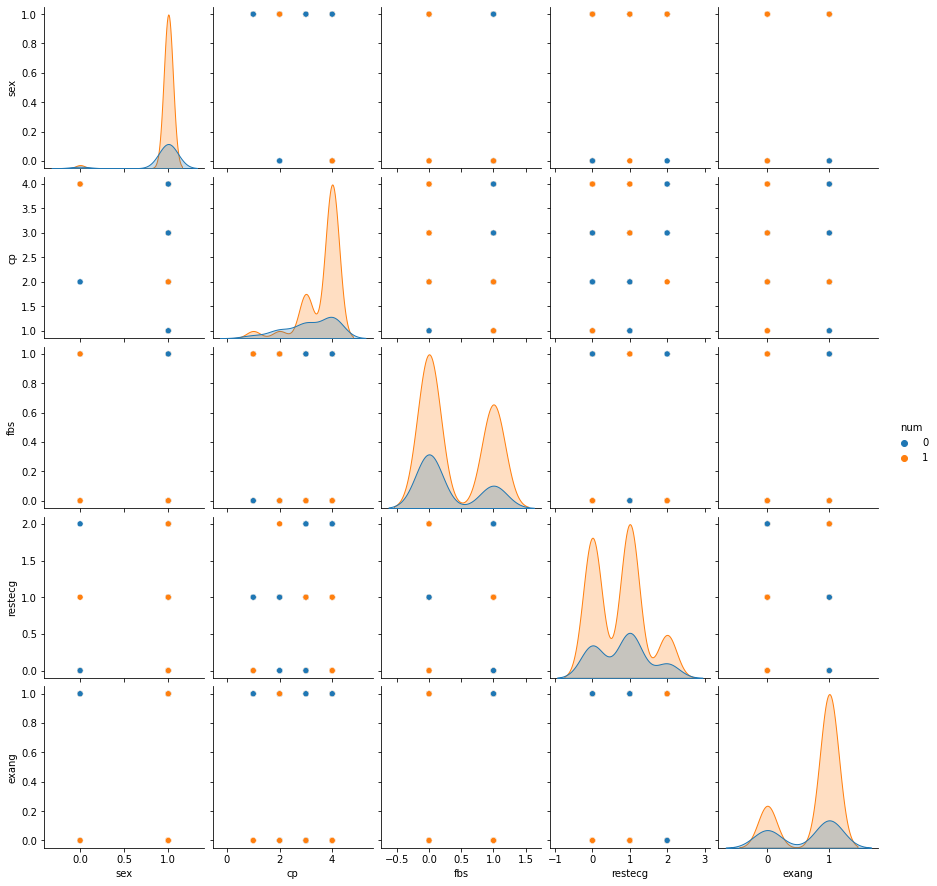

In [30]:
#interrealtion among categorical features
sns.pairplot(c, hue = 'num')

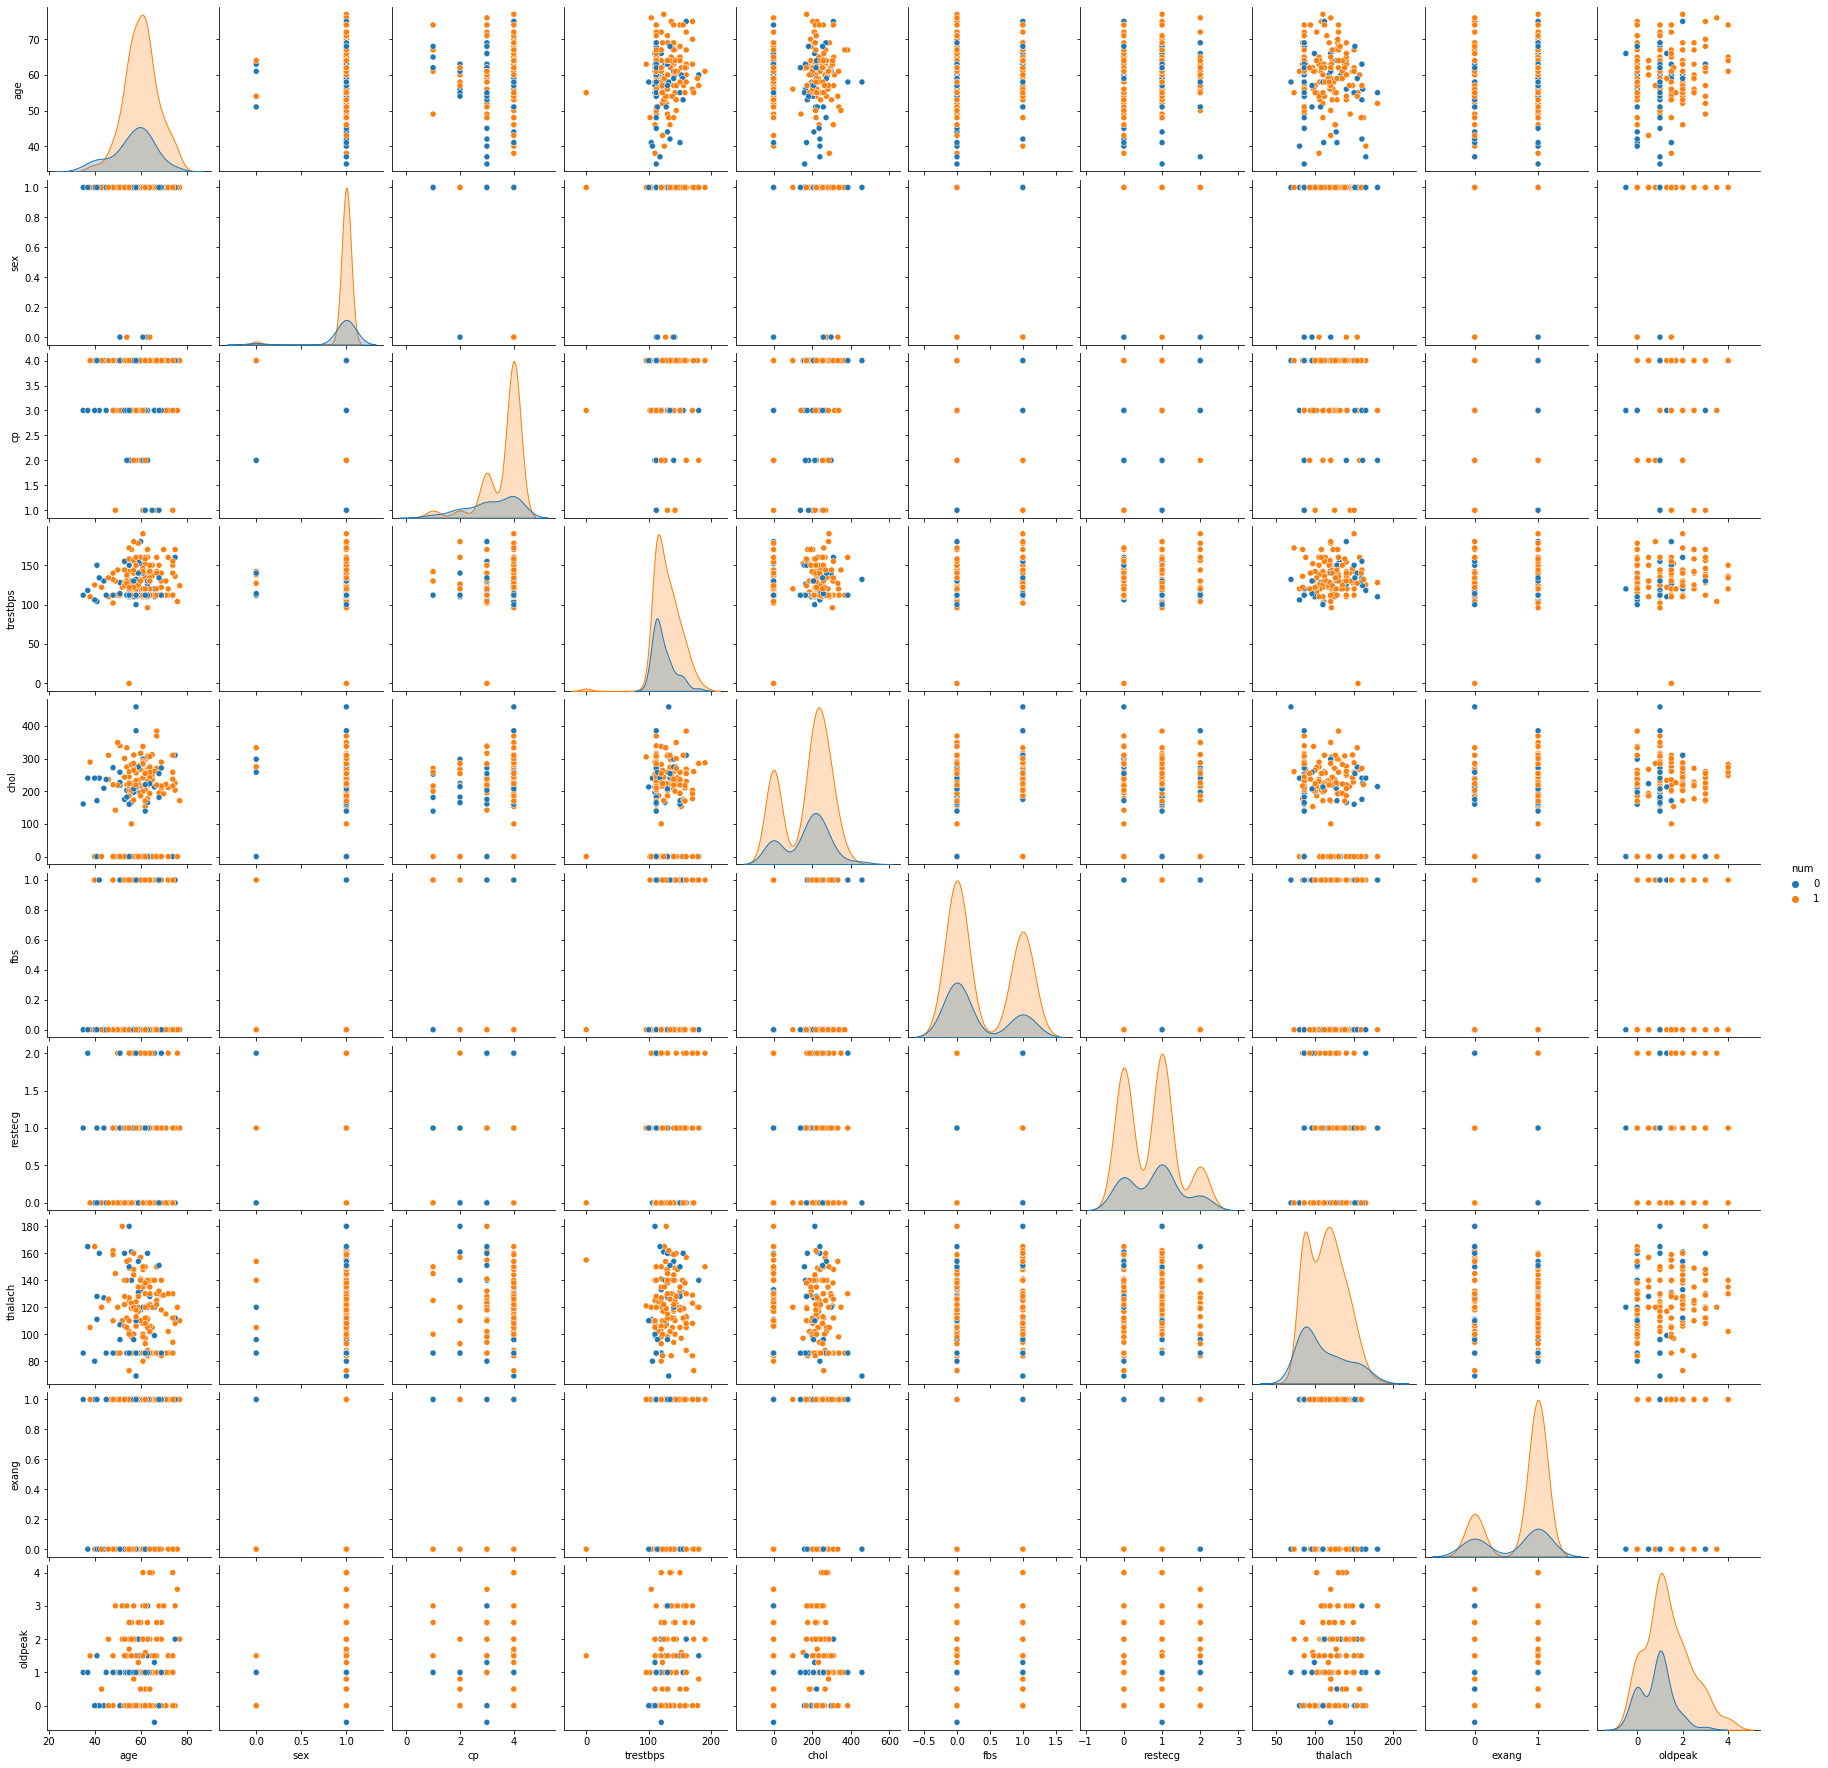

In [31]:
#interrealtion among all features
sns.pairplot(df, hue = 'num')

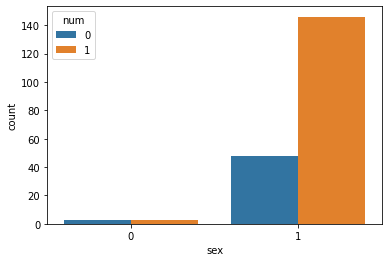

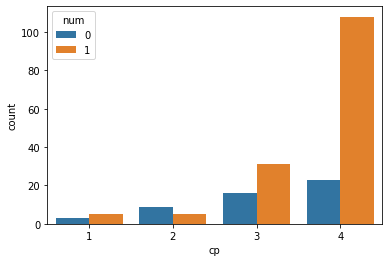

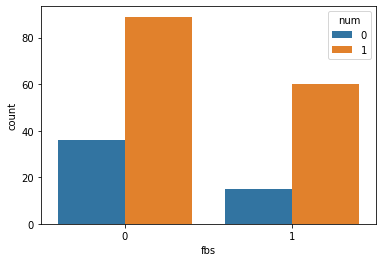

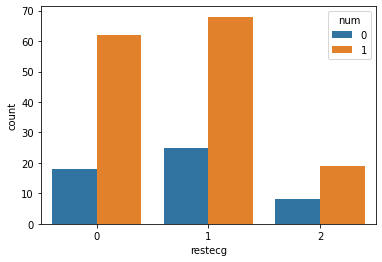

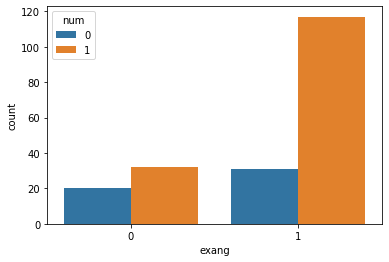

In [32]:
#determining the effect of categorical features ('sex', 'cp', 'fbs', 'restecg', 'exang') with output
for col in c.columns:
    if col=='num':
        pass
    else:   
        sns.countplot(c[col], hue = c['num'])
        plt.show()

### Conclusion
##### Sex: More male suffers a with heart disease. The ratio of male to female is 98:3 and the data is imbalanced.
##### cp : only asymtomatic cheast pain has lead to heart disease
##### fbs : people with fasting blood sugar < 120 mg/dl (62.5%) suffers more with heart disease (71%)
##### restecg : normal (77%) and having ST-T  wave abnormality (73%) have shown significant heart disease of its cases. Similarly left ventricular hypertrophy also shows (70%) heart disease cases. 
All three caregory shows approx 70% coreelation to the target and hence the feature can be ignored.
#### exang: approx 90% patients with exercise induced angina have heart disease

### Supporting data

In [33]:
c.groupby('fbs')['num'].value_counts()

fbs  num
0    1      89
     0      36
1    1      60
     0      15
Name: num, dtype: int64

In [34]:
c.groupby('restecg')['num'].value_counts(normalize = True)

restecg  num
0        1      0.775000
         0      0.225000
1        1      0.731183
         0      0.268817
2        1      0.703704
         0      0.296296
Name: num, dtype: float64

In [35]:
c.groupby('exang')['num'].value_counts(normalize = True)

exang  num
0      1      0.615385
       0      0.384615
1      1      0.790541
       0      0.209459
Name: num, dtype: float64

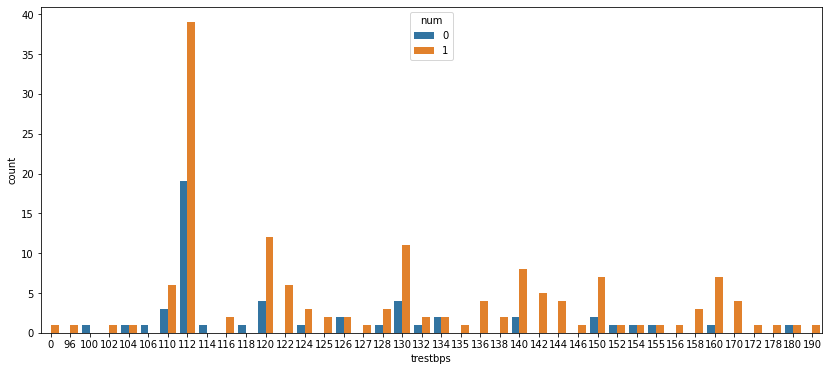

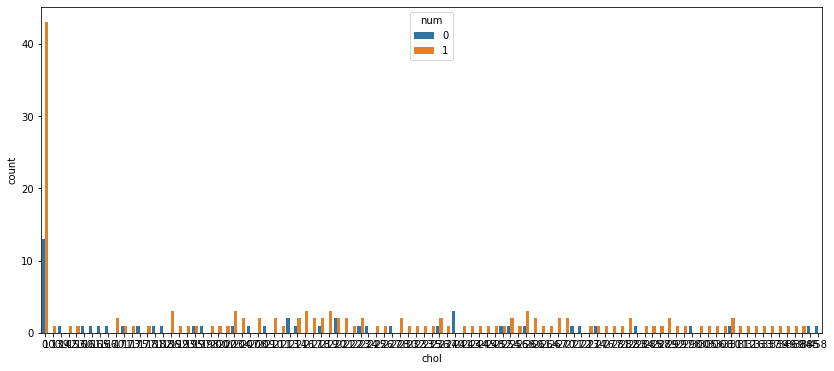

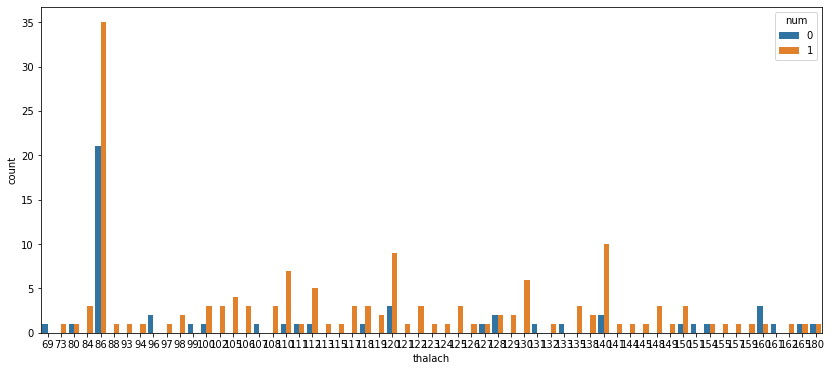

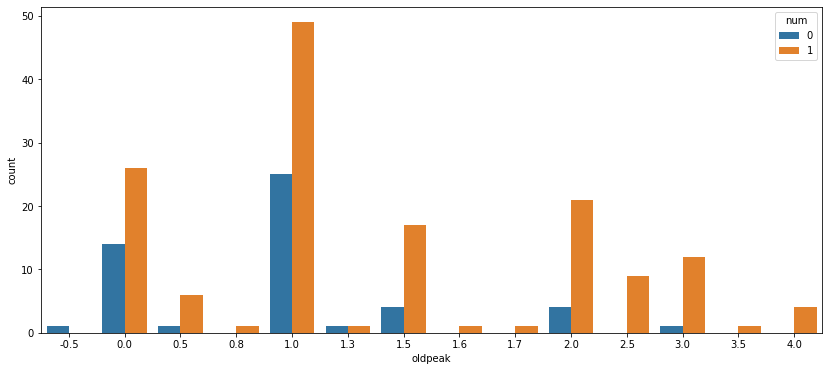

In [36]:
#determining the effect of non categorical features ('age', 'trestbps', 'chol', 'thalach', 'oldpeak',) with output
for col in nc.columns:
    if (col=='num') or (col=='age'):
        pass
    else:   
        plt.figure(figsize = (14,6))
        sns.countplot(nc[col], hue =nc['num'])
        plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

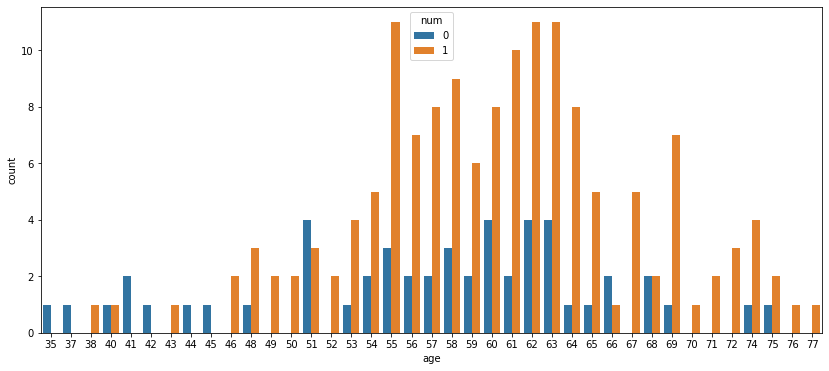

In [37]:
plt.figure(figsize = (14,6))
sns.countplot(df['age'], hue = df['num'])

<AxesSubplot:>

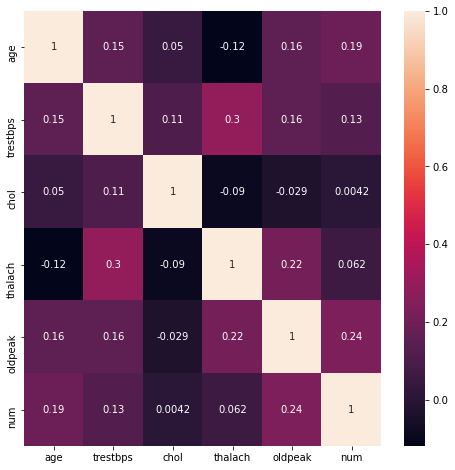

In [38]:
plt.figure(figsize = (8,8))
sns.heatmap(nc.corr(), annot = True)

The ratio of heart disesase to healthy patience increases after the age of 55 ans is consistent except 2/3 occaions

## Feature Engineering
### Outliers

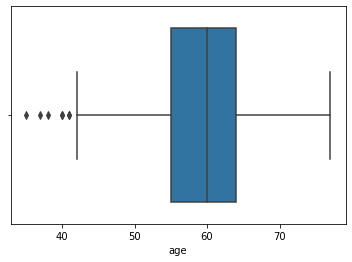

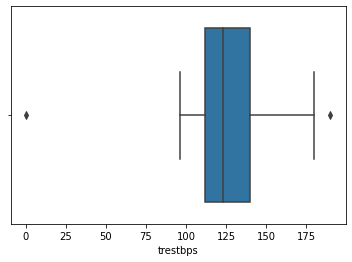

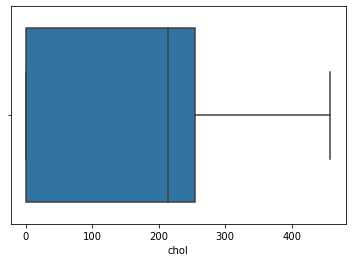

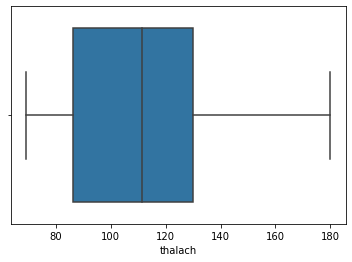

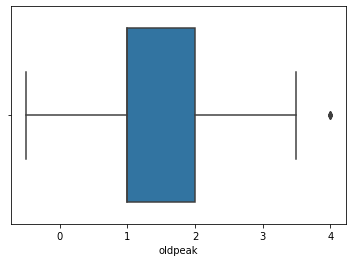

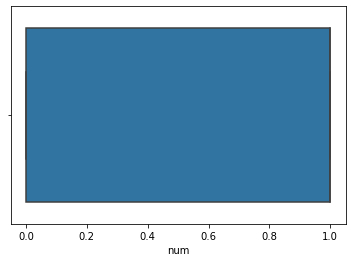

In [47]:
#determining the outliers in non categorical features ('age', 'trestbps', 'chol', 'thalach', 'oldpeak',) with output
for col in nc.columns:
        sns.boxplot(nc[col])
        plt.show()

In [ ]:
sns.boxplot(df)

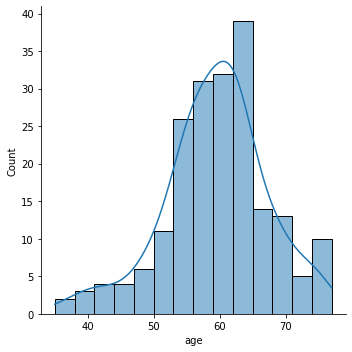

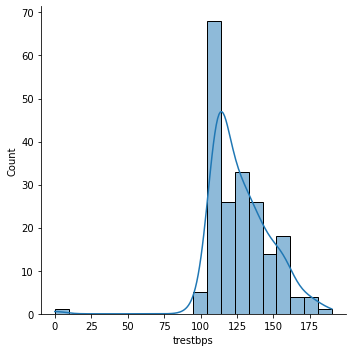

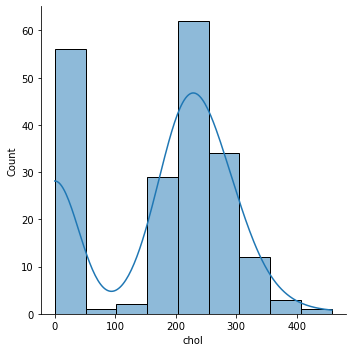

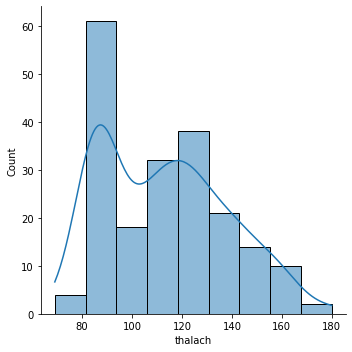

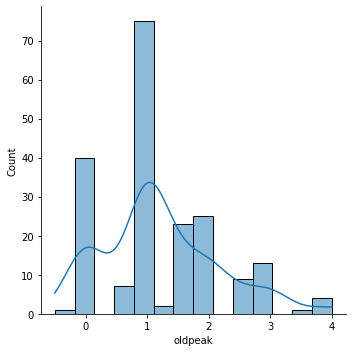

In [45]:
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    if (col=='num'):
        pass
    else:
        sns.displot(nc[col], kde = True)
       #df[col].plot(kind = 'box')
        plt.show()

In [42]:
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    IQR = df[col].describe()['75%'] - df[col].describe()['25%']
    ul =df[col].describe()['75%'] + 1.5*IQR
    ll =df[col].describe()['25%'] - 1.5*IQR
    
    filt = (df[col] < ll) | (df[col] > ul) 
    
    df[col].loc[filt] = df[col].median()

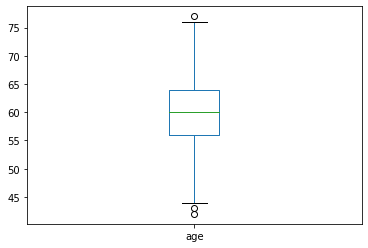

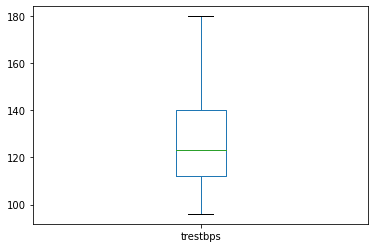

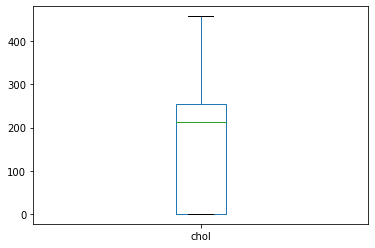

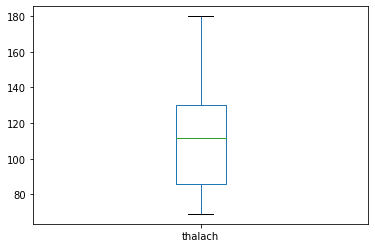

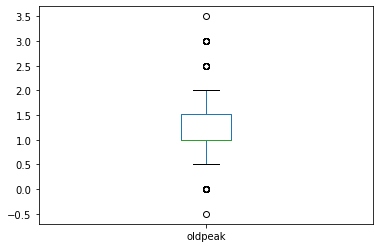

In [43]:
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    df[col].plot(kind = 'box')
    plt.show()

### Skewness

In [48]:
df.skew()

age         0.066452
sex        -5.552105
cp         -1.648734
trestbps    0.855684
chol       -0.469975
fbs         0.520308
restecg     0.391463
thalach     0.443632
exang      -1.102593
oldpeak     0.451787
num        -1.132724
dtype: float64

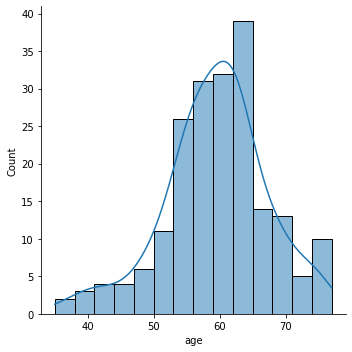

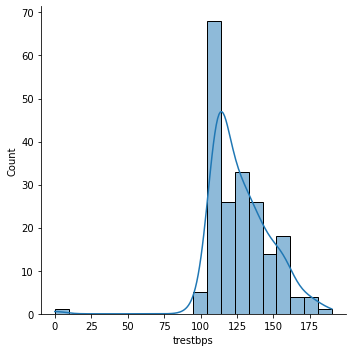

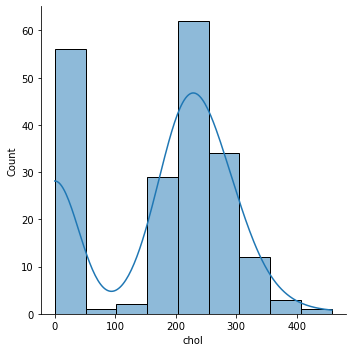

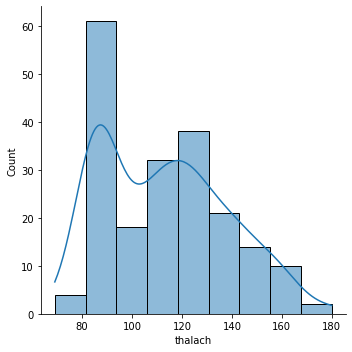

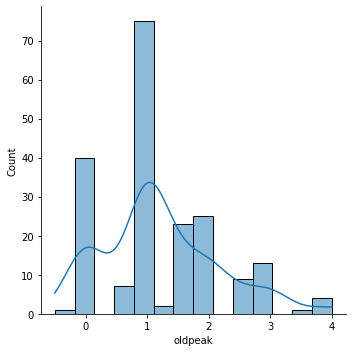

In [49]:
for col in nc.columns:
    if (col=='num'):
        pass
    else:
        sns.displot(nc[col], kde = True)

In [50]:
#Using log normaization 
for col in nc.columns:
    if (col=='num'):
        pass
    else:
        df[col] = np.log1p(df[col])

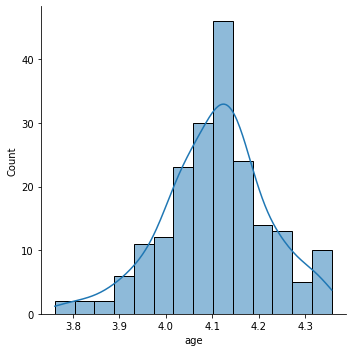

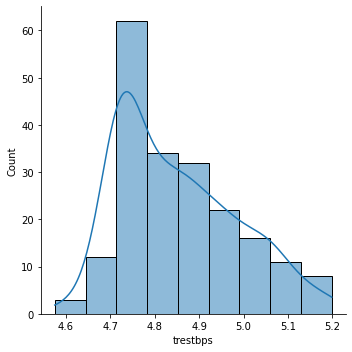

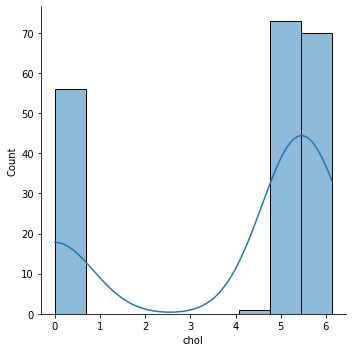

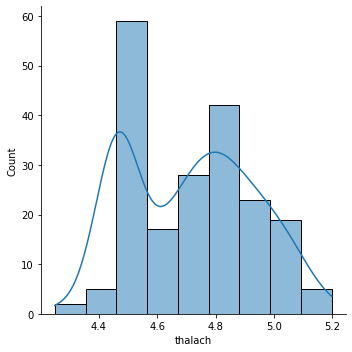

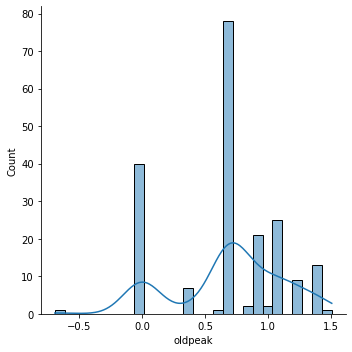

In [51]:
for col in nc.columns:
    if (col=='num'):
        pass
    else:
        sns.displot(df[col], kde = True)

In [55]:
#dividing the Input and output parameters
x=df.drop('num', axis =1)
y=df['num']

In [56]:
#standardixing the data (Using min max scalar)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x = pd.DataFrame(mm.fit_transform(x), columns = x.columns)

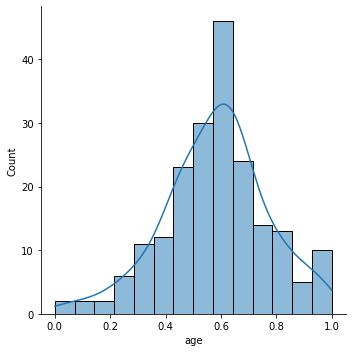

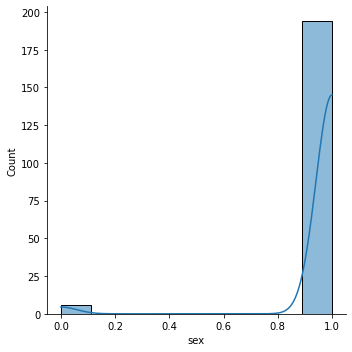

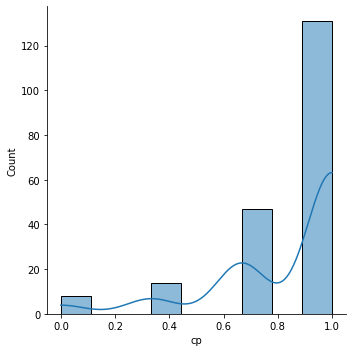

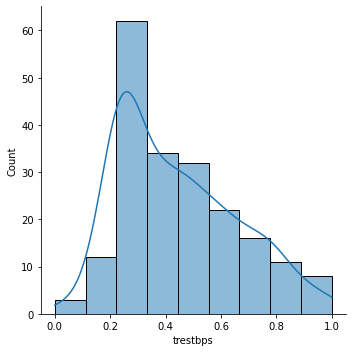

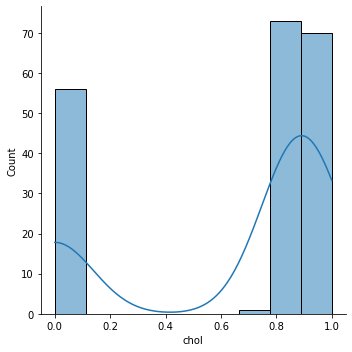

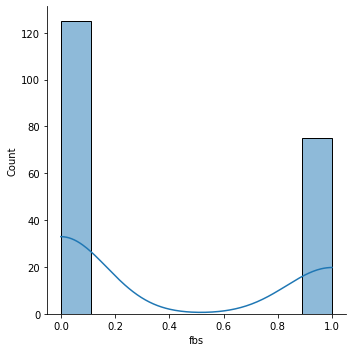

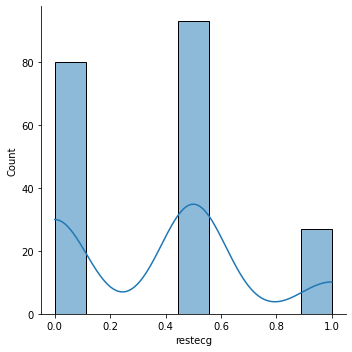

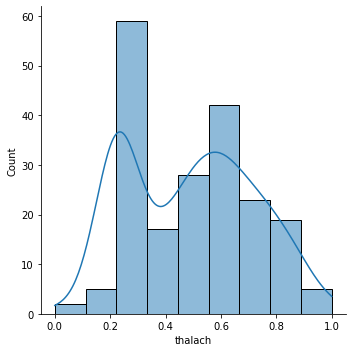

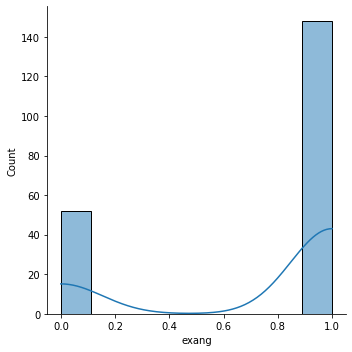

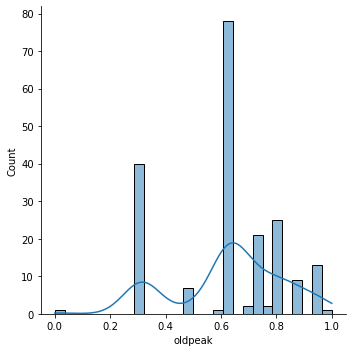

In [59]:
for col in x.columns:
    sns.displot(x[col], kde = True)

# Model selection using lazy Predict

In [63]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state =42)

#Defining and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 16.96it/s]

[01:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
# top 5 model prediction using lazy redict
train.sort_values(by = 'Accuracy', ascending= False).head()

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.85,0.72,0.72,0.84,0.02
KNeighborsClassifier,0.82,0.61,0.61,0.79,0.03
SVC,0.82,0.61,0.61,0.79,0.02
PassiveAggressiveClassifier,0.80,0.69,0.69,0.80,0.02
CalibratedClassifierCV,0.80,0.55,0.55,0.75,0.06


In [74]:
test.sort_values(by = 'Accuracy', ascending= False).head()

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.85,0.72,0.72,0.84,0.02
KNeighborsClassifier,0.82,0.61,0.61,0.79,0.03
SVC,0.82,0.61,0.61,0.79,0.02
PassiveAggressiveClassifier,0.80,0.69,0.69,0.80,0.02
CalibratedClassifierCV,0.80,0.55,0.55,0.75,0.06


In [126]:
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.calibration import CalibratedClassifierCV 
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [109]:
#Taking top 5 results of the lazy predict
cl = [NuSVC(), KNeighborsClassifier(), SVC(),
       PassiveAggressiveClassifier(), CalibratedClassifierCV()]

## Cross validation

In [147]:
from sklearn.model_selection import cross_val_score
for i in cl:
    scores=cross_val_score(i,x,y,cv=5)
    print("scores of ",i)
    print("mean score",scores.mean())
    print("Standard deviation",scores.std())
    print('\n-------------------------------------------------------------------------------------------------------')

scores of  NuSVC()
mean score 0.77
Standard deviation 0.04301162633521313

-------------------------------------------------------------------------------------------------------
scores of  KNeighborsClassifier()
mean score 0.775
Standard deviation 0.035355339059327376

-------------------------------------------------------------------------------------------------------
scores of  SVC()
mean score 0.76
Standard deviation 0.025495097567963948

-------------------------------------------------------------------------------------------------------
scores of  PassiveAggressiveClassifier()
mean score 0.7
Standard deviation 0.10488088481701516

-------------------------------------------------------------------------------------------------------
scores of  CalibratedClassifierCV()
mean score 0.755
Standard deviation 0.02915475947422653

-------------------------------------------------------------------------------------------------------


##### KNN is givng best results and less standard deviation than NuSVC
## Using GridSearchCV to improve KNeighborsClassifier

In [149]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors': [3,5,11,19],  
              'weights': ['uniform','distance'],'metric':['euclidean','manhattan']}
gss=GridSearchCV(knn,parameters,cv=3)
gs=gss.fit(x_train,y_train)
gs.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state = 58)
knn=KNeighborsClassifier(metric= 'euclidean', n_neighbors= 11, weights= 'uniform')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("accuracy score of ",knn,'is',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,zero_division=1))

accuracy score of  KNeighborsClassifier(metric='euclidean', n_neighbors=11) is 0.85
[[ 4  5]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.86      0.97      0.91        31

    accuracy                           0.85        40
   macro avg       0.83      0.71      0.74        40
weighted avg       0.84      0.85      0.83        40



## Using ensembler techniques to improve accuracy

In [161]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=80)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7
[[ 2  7]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.29      0.22      0.25         9
           1       0.79      0.84      0.81        31

    accuracy                           0.70        40
   macro avg       0.54      0.53      0.53        40
weighted avg       0.67      0.70      0.69        40



In [167]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=15,random_state=80)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7
[[ 3  6]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         9
           1       0.81      0.81      0.81        31

    accuracy                           0.70        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.70      0.70      0.70        40



### Best model with roc_curve
Knn Gives the best result

accuracy score of  KNeighborsClassifier(metric='euclidean', n_neighbors=11) is 0.85
[[ 4  5]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.86      0.97      0.91        31

    accuracy                           0.85        40
   macro avg       0.83      0.71      0.74        40
weighted avg       0.84      0.85      0.83        40



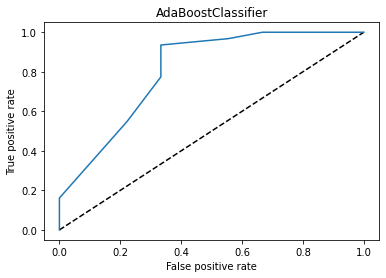

auc_score 0.7060931899641577


In [169]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state = 58)
knn=KNeighborsClassifier(metric= 'euclidean', n_neighbors= 11, weights= 'uniform')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("accuracy score of ",knn,'is',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,zero_division=1))
y_pred_prob=knn.predict_proba(x_test)[:,1]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()
auc_score=roc_auc_score(y_test,knn.predict(x_test))
print("auc_score",auc_score)